In [13]:
import cv2 as cv
import numpy as np 
import math
from matplotlib import pyplot as plt

In [14]:
img_0 = cv.imread('/home/felipe/Desktop/PDI_2020_1/standard_test_images/cameraman.tif')
img_1 = cv.imread('/home/felipe/Desktop/PDI_2020_1/standard_test_images/lake.tif')

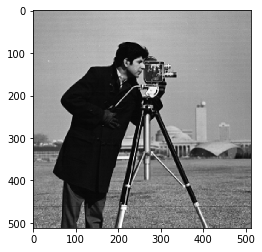

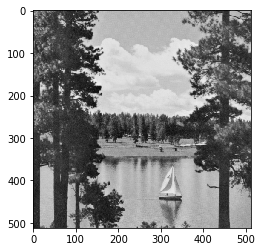

Cameraman size: (512, 512, 3)
Lake size: (512, 512, 3)


In [15]:
plt.imshow(img_0)
plt.show()
plt.imshow(img_1)
plt.show()
print("Cameraman size: "+str(img_0.shape))
print("Lake size: "+str(img_1.shape))

In [16]:
def is_power(n):
    if math.log2(n).is_integer():
        return True
    else: 
        return False   

In [17]:
def pixel_elimination(img, jump, parity, mirror):
    aux_img = np.zeros_like(mirror)
    #if parity == 0:
    aux = 0
    jump_count = -1
    for i in range(img.shape[0]):
        jump_count = jump_count + 1
        if jump_count == jump:
            jump_count = 0
        if jump_count == 0:
            aux_img[aux,:] = img[i,:] 
            aux = aux + 1
    return aux_img

In [18]:
def downresize_p2(img, reduction):
    """This fucntion does the downsampling of the input Image"""
    if not(is_power(reduction) and img.shape[0] == img.shape[1]):
        print("This down resize just made power of 2 recizing") 
        return img    
    else: 
        jumps = reduction
        n_dimension = int(img.shape[0]/reduction)
        new_image = np.zeros((n_dimension,n_dimension,img.shape[2]), dtype = np.uint8)
        aux_image = np.zeros((n_dimension,img.shape[1],img.shape[2]), dtype = np.uint8)
        aux = 0
        j_count = -1
        for i in range(img.shape[0]):
            j_count = j_count + 1
            if j_count == jumps:
                j_count = 0
            if j_count == 0:
                aux_image[aux,:,:] = img[i,:,:]    
                aux = aux + 1
        aux = 0        
        for i in range(n_dimension): 
                new_image[i,:,:] = pixel_elimination(aux_image[i,:,:],jumps, aux, new_image[i,:,:]) 
    new_image = np.uint8(new_image)
    return new_image

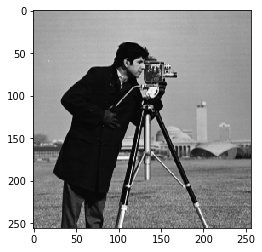

In [29]:
new_image = downresize_p2(img_0,2)
plt.imshow(new_image)
plt.show()

In [42]:
def NNI_upresize_p2(img, ampliation):
    """This fucntion does the downsampling of the input Image"""
    if not(is_power(ampliation) and img.shape[0] == img.shape[1]):
        print("This down resize just made power of 2 recizing") 
        return img    
    else: 
        n_dimension = int(img.shape[0]*ampliation)
        new_image = np.zeros((n_dimension,n_dimension,img.shape[2]), dtype = np.uint8)
        aux_image = np.zeros((n_dimension,img.shape[1],img.shape[2]), dtype = np.uint8)
        for i in range(n_dimension-1):
            x = int(np.ceil(i*img.shape[0]/n_dimension))
            aux_image[i,:,:] = img[x,:,:]
        for i in range(n_dimension-1):
            x = int(np.ceil(i*img.shape[0]/n_dimension))
            new_image[:,i,:] = aux_image[:,x,:]
        new_image = np.uint8(new_image)       
    return new_image

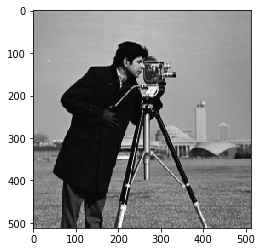

In [44]:
n_image = NNI_upresize_p2(new_image,2)
plt.imshow(n_image)
plt.show()

In [48]:
def Bi_upresize_p2(img, ampliation):
    """This fucntion does the downsampling of the input Image"""
    if not(is_power(ampliation) and img.shape[0] == img.shape[1]):
        print("This down resize just made power of 2 recizing") 
        return img    
    else: 
        n_dimension = int(img.shape[0]*ampliation)
        new_image = np.zeros((n_dimension,n_dimension,img.shape[2]), dtype = np.uint8)
        aux_image = np.zeros((n_dimension,img.shape[1],img.shape[2]), dtype = np.uint8)
        for i in range(n_dimension-1):
            x_minus = int(np.ceil(i*img.shape[0]/n_dimension))
            x_plus = int(np.floor(i*img.shape[0]/n_dimension))
            aux_image[i,:,:] = (((i-x_minus)*img.shape[0]/n_dimension)*img[x_minus,:,:])+(((x_plus - i)*img.shape[0]/n_dimension)*img[x_plus,:,:])
        for i in range(n_dimension-1):
            y_minus = int(np.ceil(i*img.shape[0]/n_dimension))
            y_plus  = int(np.floor(i*img.shape[0]/n_dimension))
            aux_image[:,i,:] = (((i-y_minus)*img.shape[0]/n_dimension)*img[:,y_minus,:])+(((y_plus - i)*img.shape[0]/n_dimension)*img[:,y_plus,:])
        new_image = np.uint8(new_image)       
    return new_image

In [49]:
n_image1 = Bi_upresize_p2(new_image,2)
plt.imshow(n_image1)
plt.show()

ValueError: could not broadcast input array from shape (256,3) into shape (512,3)